In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [2]:
path = "C:/Users/user/One Drive Epita/OneDrive - EPITA/Documents/Python/Python notebook/Source Files/Data Visualisation Sem2/Data/Combined By Philipe Fontaine/"

df_caracteristiques = pd.read_csv(fr"{path}caracteristiques.csv", encoding='ISO-8859-1', sep=',', low_memory=False)
df_lieux = pd.read_csv(fr"{path}lieux.csv", encoding='ISO-8859-1', sep=',', low_memory=False)
df_vehicules = pd.read_csv(fr"{path}vehicules.csv", encoding='ISO-8859-1', sep=',', low_memory=False)
df_usagers = pd.read_csv(fr"{path}usagers.csv", encoding='ISO-8859-1', sep=',', low_memory=False)

In [3]:
df_caracteristiques = df_caracteristiques.drop(df_caracteristiques[df_caracteristiques['annee'] == 2020].index)
df_caracteristiques = df_caracteristiques.drop(df_caracteristiques[df_caracteristiques['annee'] == 2021].index)
print(df_caracteristiques['annee'].unique())

df_lieux = df_lieux.drop(df_lieux[df_lieux['annee'] == 2020].index)
df_lieux = df_lieux.drop(df_lieux[df_lieux['annee'] == 2021].index)
print(df_lieux['annee'].unique())

df_vehicules = df_vehicules.drop(df_vehicules[df_vehicules['annee'] == 2020].index)
df_vehicules = df_vehicules.drop(df_vehicules[df_vehicules['annee'] == 2021].index)
print(df_vehicules['annee'].unique())

df_usagers = df_usagers.drop(df_usagers[df_usagers['annee'] == 2020].index)
df_usagers = df_usagers.drop(df_usagers[df_usagers['annee'] == 2021].index)
print(df_usagers['annee'].unique())

[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019]
[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019]
[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019]
[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019]


In [4]:
print(f"Colonnes des caracteristiques : {df_caracteristiques.columns}\n")
print(f"Colonnes des Lieux : {df_lieux.columns}\n")
print(f"Colonnes des  Vehicules : {df_vehicules.columns}\n")
print(f"Colonnes des  Usagers : {df_usagers.columns}")

Colonnes des caracteristiques : Index(['Unnamed: 0', 'num_acc', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int',
       'atm', 'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep', 'annee'],
      dtype='object')

Colonnes des Lieux : Index(['Unnamed: 0', 'num_acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv',
       'pr', 'pr1', 'vosp', 'prof', 'plan', 'lartpc', 'larrout', 'surf',
       'infra', 'situ', 'env1', 'annee', 'vma'],
      dtype='object')

Colonnes des  Vehicules : Index(['Unnamed: 0', 'num_acc', 'senc', 'catv', 'occutc', 'obs', 'obsm',
       'choc', 'manv', 'num_veh', 'annee', 'id_vehicule', 'motor'],
      dtype='object')

Colonnes des  Usagers : Index(['Unnamed: 0', 'num_acc', 'place', 'catu', 'grav', 'sexe', 'trajet',
       'secu', 'locp', 'actp', 'etatp', 'an_nais', 'num_veh', 'annee',
       'id_vehicule', 'secu1', 'secu2', 'secu3'],
      dtype='object')


In [5]:
df_caracteristiques['long']

0             294400
1             280200
2             280000
3             240800
4             247500
             ...    
1017304    5,0561200
1017305    7,7269000
1017306    2,3457600
1017307    2,2237590
1017308    2,1751101
Name: long, Length: 1017309, dtype: object

In [6]:
df_map = df_caracteristiques[['long','lat']]
df_map

,long,lat
0,294400,5051500
1,280200,5053700
2,280000,5054600
3,240800,5098700
4,247500,5096400
...,...,...
1017304,"5,0561200","45,6666600"
1017305,"7,7269000","48,5769000"
1017306,"2,3457600","48,7717000"
1017307,"2,2237590","48,7772890"


In [7]:
df_map['long'] = pd.to_numeric(df_map['long'], errors='coerce')
df_map['lat'] = pd.to_numeric(df_map['lat'], errors='coerce')

df_map = df_map.dropna(subset=['long', 'lat'])

C:\Users\user\AppData\Local\Temp\ipykernel_75036\1025301320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map['long'] = pd.to_numeric(df_map['long'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_75036\1025301320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map['lat'] = pd.to_numeric(df_map['lat'], errors='coerce')


In [8]:
BBox = ((df_map.long.min(), df_map.long.max(), df_map.lat.min(), df_map.lat.max()))
BBox

(-524600.0, 612850000000.0, 0.0, 5564823.0)

In [9]:
df_map['long'] = df_map['long'].apply(lambda x: round(x / 1000, 3))
df_map['lat'] = df_map['lat'].apply(lambda x: round(x / 1000, 3))

C:\Users\user\AppData\Local\Temp\ipykernel_75036\2050468718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map['long'] = df_map['long'].apply(lambda x: round(x / 1000, 3))
C:\Users\user\AppData\Local\Temp\ipykernel_75036\2050468718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map['lat'] = df_map['lat'].apply(lambda x: round(x / 1000, 3))


In [10]:
BBox = ((df_map.long.min(), df_map.long.max(), df_map.lat.min(), df_map.lat.max()))
BBox

(-524.6, 612850000.0, 0.0, 5564.823)

In [11]:
df_map.describe()

,long,lat
count,4.681880e+05,468188.000000
mean,2.644373e+03,3278.131307
std,1.176891e+06,2145.177466
min,-5.246000e+02,0.000000
25%,0.000000e+00,0.000000
50%,1.297830e+02,4517.270000
75%,3.498000e+02,4848.525750
max,6.128500e+08,5564.823000


In [20]:
print(df_map.dtypes)

long    float64
lat     float64
dtype: object


In [12]:
df_clean = df_map[(df_map['long'] >= -5.1) & (df_map['long'] <= 9.6) & (df_map['lat'] >= 42.5) & (df_map['lat'] <= 51.1)]

In [14]:
BBox = ((df_clean['long'].min(), df_clean['long'].max(), df_clean['lat'].min(), df_clean['lat'].max()))
BBox

(nan, nan, nan, nan)

,long,lat


ValueError: Axis limits cannot be NaN or Inf

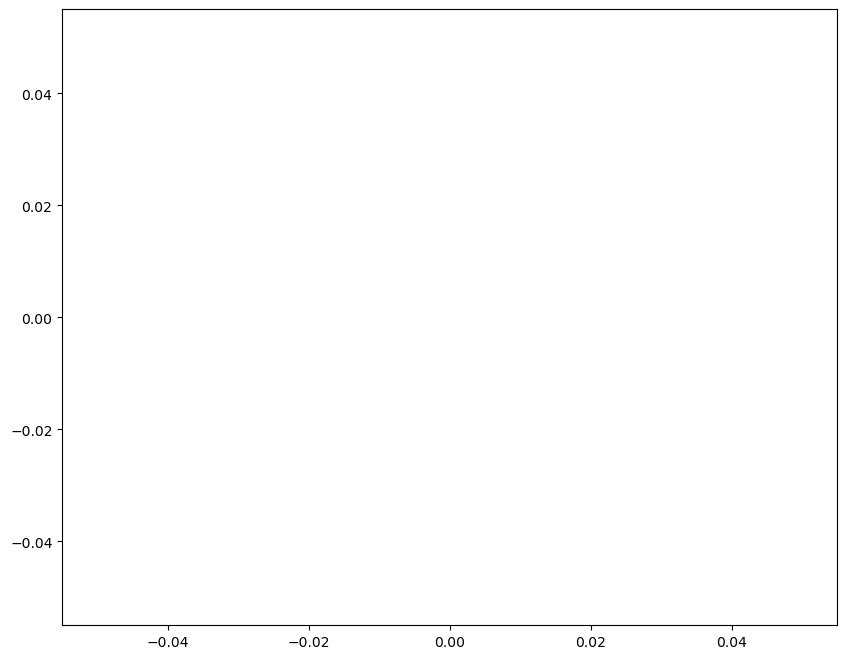

In [13]:
# create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# plot the scatter points
ax.scatter(df_clean['long'], df_clean['lat'], color='red', s=10)

# set the map boundary box
BBox = ((df_clean['long'].min(), df_clean['long'].max(), df_clean['lat'].min(), df_clean['lat'].max()))
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

# add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Scatter plot of GPS data')

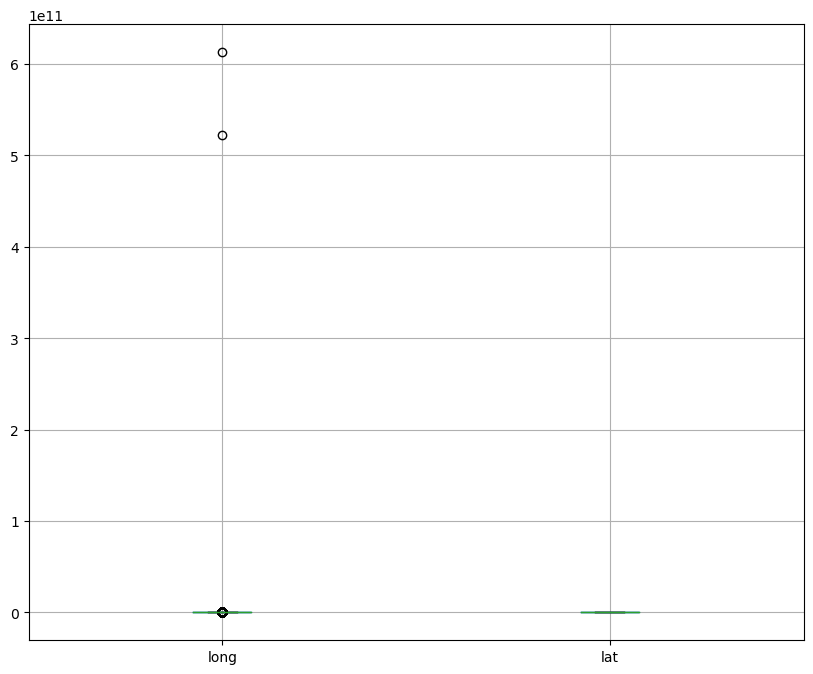

C:\Users\user\AppData\Local\Temp\ipykernel_81832\1144862914.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_map.hist(ax=ax)


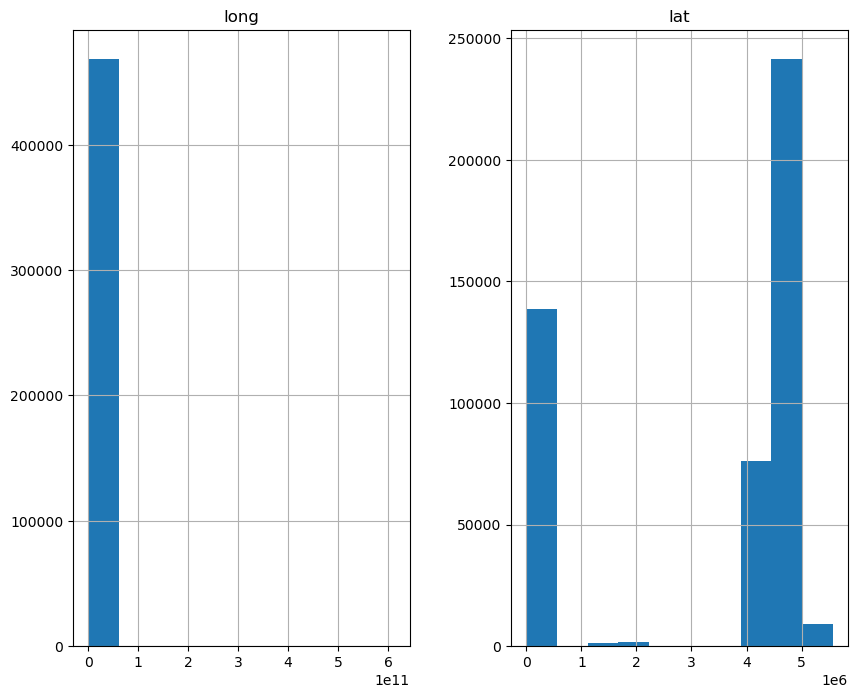

In [ ]:
# create a boxplot
fig, ax = plt.subplots(figsize=(10, 8))
df_map.boxplot(ax=ax)
plt.show()

# create a histogram
fig, ax = plt.subplots(figsize=(10, 8))
df_map.hist(ax=ax)
plt.show()

In [ ]:
# Create a map object centered on France
france_map = folium.Map(location=[46.603354, 1.888334], zoom_start=6)

for index, row in df_clean.iterrows():
    folium.Marker(location=[row['lat'], row['long']]).add_to(france_map)
    

france_map.save('france_data_map.html')